In [15]:
#Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [16]:
#Read the adatset
df_pop_est = pd.read_csv('PEA11.20231027T221019.csv')
df_pop_est.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [17]:
# Summary Statistics
summary_stats = df_pop_est.describe()
print(summary_stats)

               Year         VALUE
count  11817.000000  1.181700e+04
mean    1996.410256  5.352461e+04
std       24.463165  2.867754e+05
min     1926.000000  6.000000e+00
25%     1986.000000  1.242700e+04
50%     2004.000000  2.667500e+04
75%     2014.000000  3.557700e+04
max     2023.000000  5.281612e+06


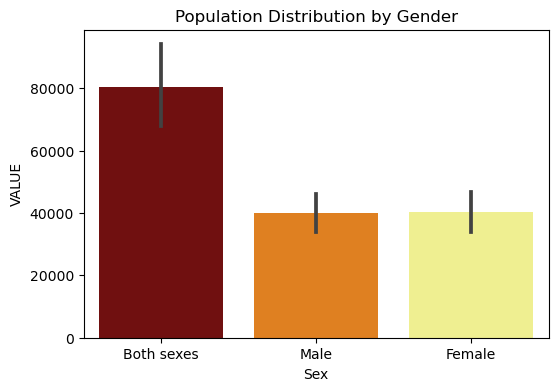

In [38]:
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='VALUE', data=df_pop_est, palette='afmhot')
plt.title('Population Distribution by Gender')
plt.show()

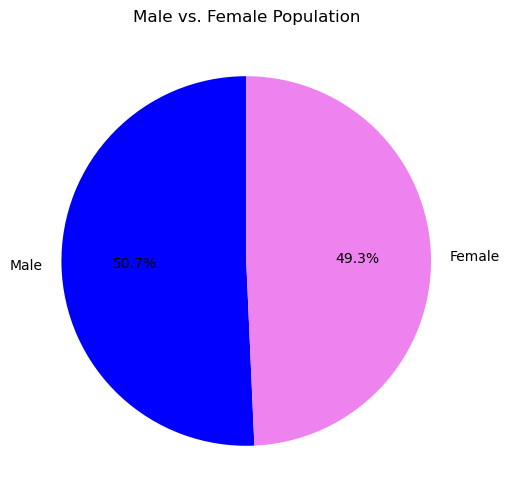

In [40]:
# Extracting male and female population for 'All ages' category
male_population = df_pop_est.loc[(df_pop_est['Single Year of Age'] == 'All ages') & (df_pop_est['Sex'] == 'Male'), 'VALUE'].values[0]
female_population = df_pop_est.loc[(df_pop_est['Single Year of Age'] == 'All ages') & (df_pop_est['Sex'] == 'Female'), 'VALUE'].values[0]
populations = [male_population, female_population]
genders = ['Male', 'Female']
colors = ['blue', 'violet']  # Custom colors for Male and Female 

#  pie chart 
plt.figure(figsize=(6, 6))
plt.pie(populations, labels=genders, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Male vs. Female Population')
plt.show()




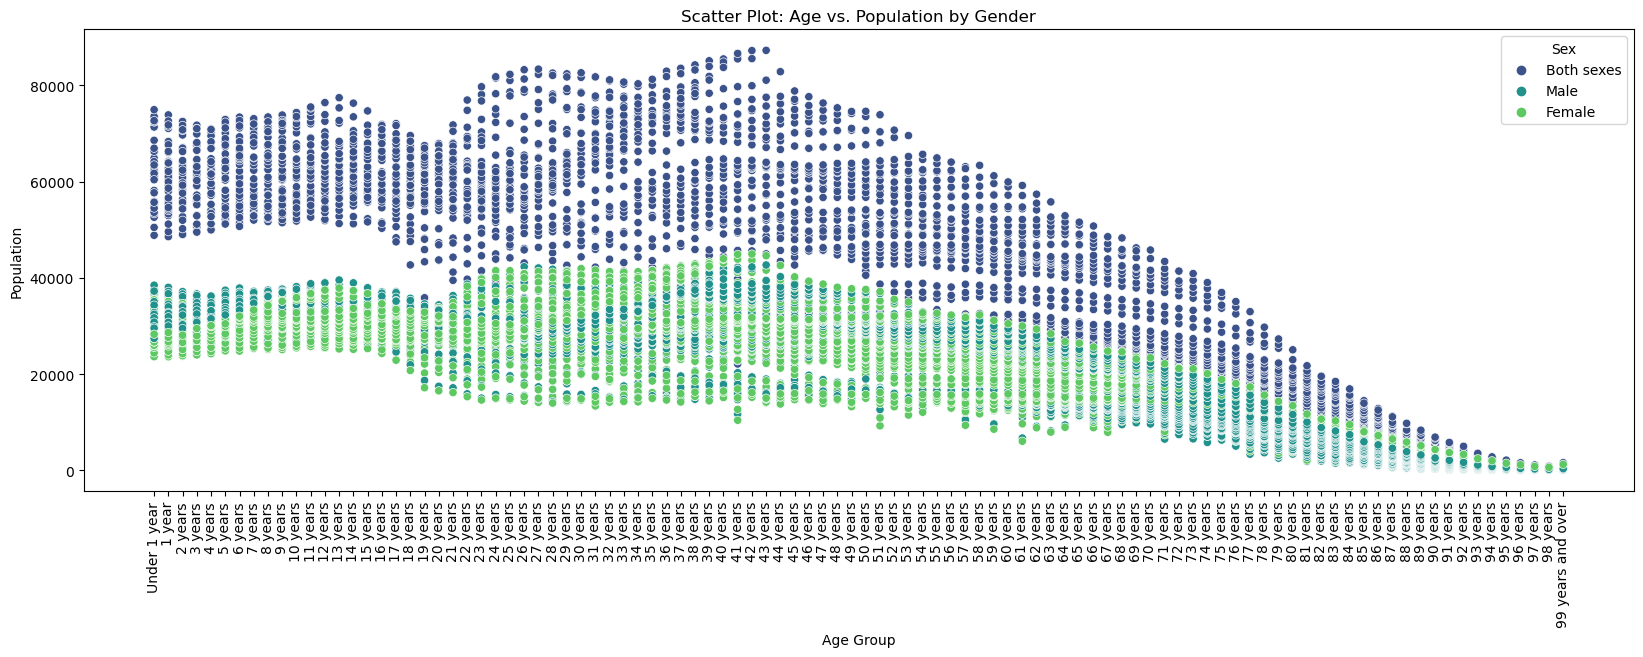

In [32]:
#Scatter Plot: Age vs. Population by Gender
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_pop_est[df_pop_est['Single Year of Age'] != 'All ages'], x='Single Year of Age', y='VALUE', hue='Sex', palette='viridis')
plt.title('Scatter Plot: Age vs. Population by Gender')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


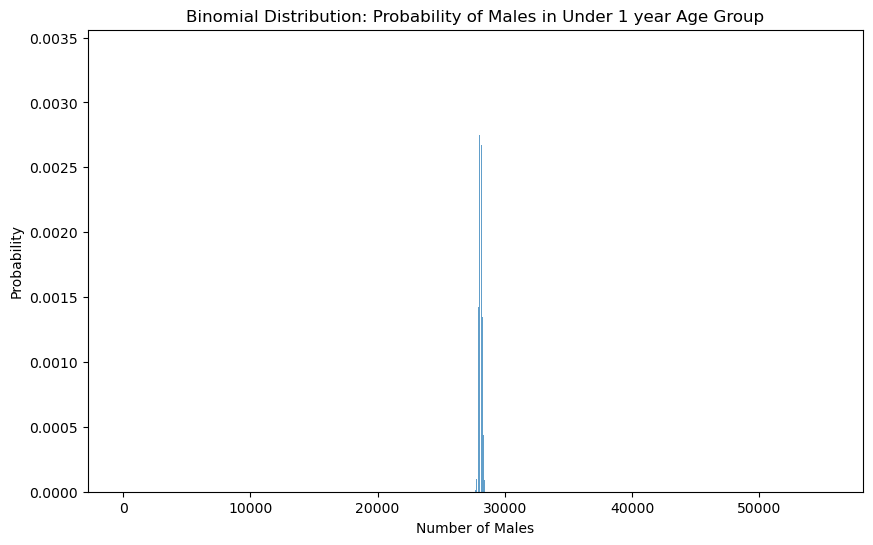

In [42]:
# Extracting data for 'Under 1 year' age group
total_population_under_1 = df_pop_est.loc[df_pop_est['Single Year of Age'] == 'Under 1 year', 'VALUE'].values[0]
proportion_male = df_pop_est.loc[(df_pop_est['Single Year of Age'] == 'Under 1 year') & (df_pop_est['Sex'] == 'Male'), 'VALUE'].values[0] / total_population_under_1

# Using Binomial Distribution
n_trials = total_population_under_1
p_success = proportion_male

# Binomial distribution values
x_binomial = np.arange(0, n_trials + 1)
binomial_dist = binom.pmf(x_binomial, n_trials, p_success)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(x_binomial, binomial_dist, align='center', alpha=0.7)
plt.title('Binomial Distribution: Probability of Males in Under 1 year Age Group')
plt.xlabel('Number of Males')
plt.ylabel('Probability')
plt.show()



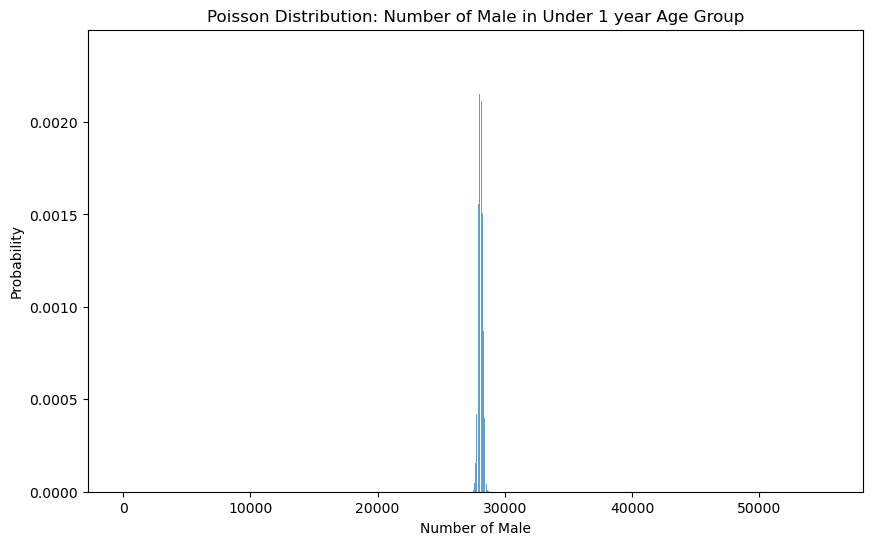

In [44]:
# Poisson Distribution
lambda_val = total_population_under_1 * proportion_male  # Average number of male  in 'Under 1 year' age group

# Poisson distribution values
x_poisson = np.arange(0, total_population_under_1 + 1)
poisson_dist = poisson.pmf(x_poisson, lambda_val)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(x_poisson, poisson_dist, align='center', alpha=0.7)
plt.title('Poisson Distribution: Number of Male in Under 1 year Age Group')
plt.xlabel('Number of Male')
plt.ylabel('Probability')
plt.show()


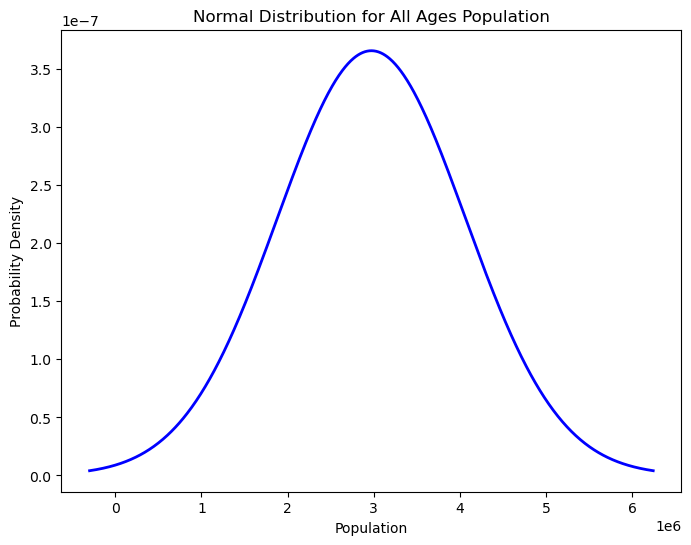

In [23]:
# Parameters for normal distribution
mu = df_pop_est.loc[df_pop_est['Single Year of Age'] == 'All ages', 'VALUE'].values[0]
sigma = df_pop_est.loc[df_pop_est['Single Year of Age'] == 'All ages', 'VALUE'].std()

# Normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
normal_dist = norm.pdf(x, mu, sigma)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x, normal_dist, 'b', lw=2)
plt.title('Normal Distribution for All Ages Population')
plt.xlabel('Population')
plt.ylabel('Probability Density')
plt.show()
